In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

+ CSV data example

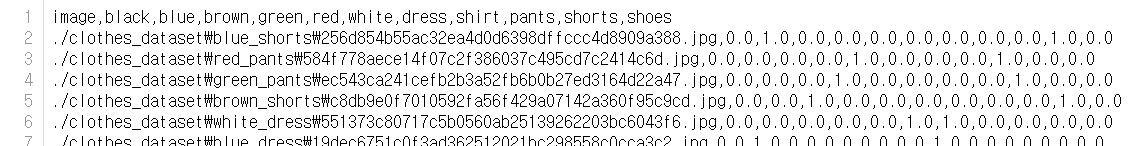

In [ ]:
df = pd.read_csv('./data/csv_data/nocolorinfo/train.csv')

class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 
             'dress', 'shirt', 'pants', 'shorts', 'shoes']
IMG_SIZE = 32

test = tf.data.Dataset.from_tensor_slices(dict(df))

# 이미지와 레이블을 얻습니다.
def get_image_label(dt):
    img_path = dt['image']
    
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = (image / 255.0)

    label = []
    
    for key in class_col:
        label.append(dt[key])
    
    return image, label

# data augment
# refer: https://www.tensorflow.org/tutorials/images/data_augmentation
def augment(image,label):
    # Add 6 pixels of padding
    image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6) 
    # Random crop back to the original size
    image = tf.image.random_crop(image, size=[IMG_SIZE, IMG_SIZE, 3])
    image = tf.image.random_brightness(image, max_delta=0.5) # Random brightness
    image = tf.clip_by_value(image, 0, 1)

    return image, label

    
dataset = test.map(get_image_label)
dataset = dataset.shuffle(50).map(augment).batch(4)